In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [6]:
def optimize_price_and_quantity(A, B, sig):
    
    N = 40000
    M = 1000
    cost = 1.25
    salvage = 0.5
    price = np.arange(4,10.1, 0.01)
    X = np.random.normal(0, sig, N)
    q = np.arange(1, M+1, 1)
    qs = np.tile(q, (N,1))
    list_optimal_profit = []
    list_optimal_price = []
    list_optimal_quantity = []
    for i in range(len(price)):
        d = A - B*price[i] + X
        ds = np.repeat(d, M).reshape(N,M)
        c = cost*qs
        rev = price[i]*np.minimum(qs, ds) + salvage*np.maximum(qs-ds, np.zeros((N,M)))
        prof = rev - c
        exp_prof = np.mean(prof, axis = 0)
        idx = np.argmax(exp_prof)
        optimal_profit = exp_prof[idx]
        optimal_price = price[i]
        optimal_quantity = q[idx]
        list_optimal_profit.append(optimal_profit)
        list_optimal_price.append(optimal_price)
        list_optimal_quantity.append(optimal_quantity)
    np_optimal_profit = np.array(list_optimal_profit)
    np_optimal_price = np.array(list_optimal_price)
    np_optimal_quantity = np.array(list_optimal_quantity)
    idx_optimal = np.argmax(np_optimal_profit)
    true_optimal_profit = np_optimal_profit[idx_optimal]
    true_optimal_price = np_optimal_price[idx_optimal]
    true_optimal_quantity = np_optimal_quantity[idx_optimal]
    # Visualization
    # First chart: Expected Profit vs. Price
    plt.figure(figsize=(8, 6))  # Optional: you can specify the size of the figure
    plt.plot(np_optimal_price, np_optimal_profit)
    plt.xlabel("Price")
    plt.ylabel("Expected Profit")
    plt.title("Expected Profit vs. Price")
    plt.show()  # This will display the current figure
    # Second chart: Expected Profit vs. Quantity
    plt.figure(figsize=(8, 6))  # Creates a new figure
    plt.plot(np_optimal_quantity, np_optimal_profit)
    plt.xlabel("Quantity")
    plt.ylabel("Expected Profit")
    plt.title("Expected Profit vs. Quantity")
    plt.show()  # This will display the current figure
    # Third chart: Price vs. Quantity
    plt.figure(figsize=(8, 6))  # Creates a new figure
    plt.plot(np_optimal_price, np_optimal_quantity)
    plt.xlabel("Price")
    plt.ylabel("Quantity")
    plt.title("Price vs. Quantity")
    plt.show()  # This will display the current figure
    return np.array([true_optimal_price, true_optimal_quantity])

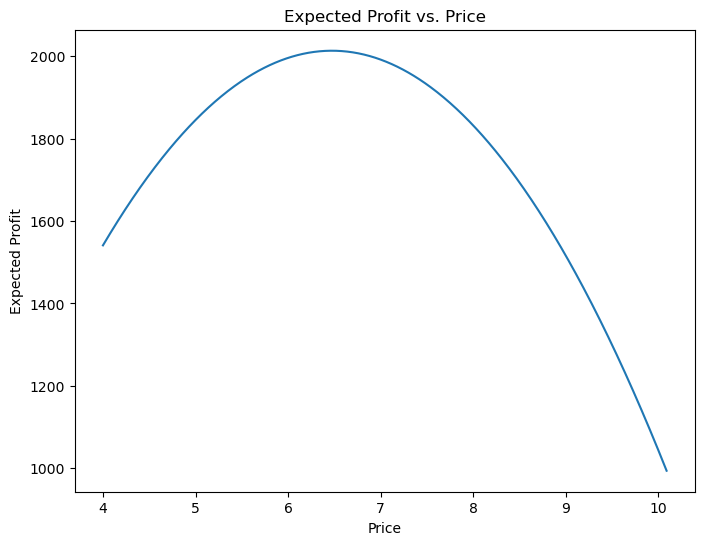

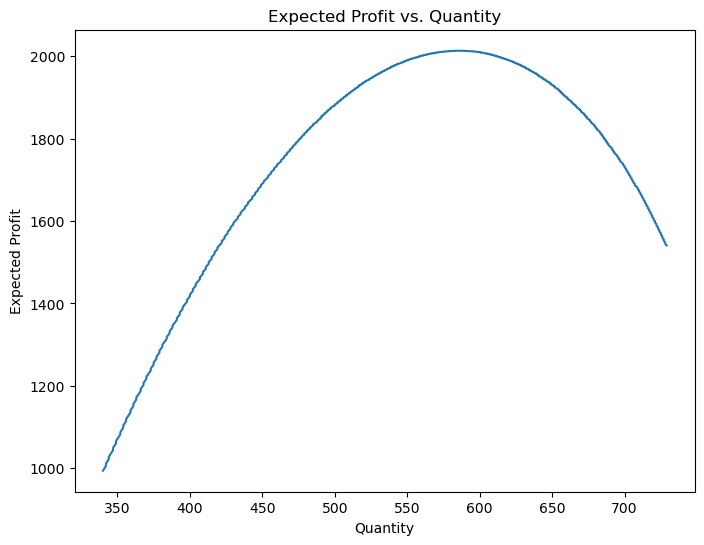

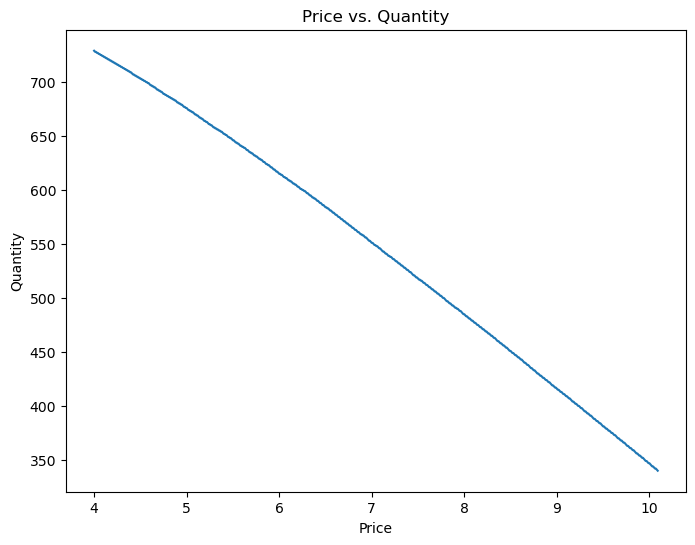

array([  6.47, 586.  ])

In [7]:
optimize_price_and_quantity(928.313, 78.607, 144.517)